In [0]:
import re
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
import sklearn
import tensorflow as tf
import seaborn as sns

In [2]:
test=pd.read_csv('/content/drive/My Drive/datasets/Tensorflow  community challenge /Datasets /twitter toxic and hatred speech/test.csv')
train=pd.read_csv('/content/drive/My Drive/datasets/Tensorflow  community challenge /Datasets /twitter toxic and hatred speech/train.csv')
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


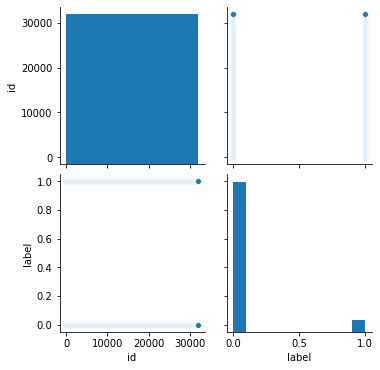

In [3]:
sns.pairplot(train)

In [0]:
train_label=train['label']
train_data=train['tweet']
test_data=test['tweet']

In [0]:
def clean_up(text):
    text = re.sub('\d+','',text)
    text = re.sub(r'[^\w\s]','',text)
    text = text.encode('ascii', 'ignore').decode('ascii')
    return text

total_data = train_data.append(test_data)
total_data = total_data.apply(clean_up)

In [6]:
train.groupby('label')['label'].count()

label
0    29720
1     2242
Name: label, dtype: int64

In [7]:
print('The shape of train is {}'.format(train_data.shape))
print('The shape of holdout test is {}'.format(test_data.shape))

The shape of train is (31962,)
The shape of holdout test is (17197,)


In [0]:
max_features=2000
word_ind=dict()

In [0]:
def tokenize(word):
  tokenizer=Tokenizer(num_words=2000,split=' ')
  tokenizer.fit_on_texts(word.values)
  word_ind=tokenizer.word_index
  sequences=tokenizer.texts_to_sequences(word.values)
  padded=pad_sequences(sequences,truncating='post')
  return padded

In [10]:
total_data = tokenize(total_data)
x_train = total_data[:train_data.shape[0]]
holdout_test = total_data[x_train.shape[0]:]
print(train.groupby('label')['label'].count())
print('The shape of train is {}'.format(x_train.shape))
print('The shape of holdout test is {}'.format(test_data.shape))

label
0    29720
1     2242
Name: label, dtype: int64
The shape of train is (31962, 31)
The shape of holdout test is (17197,)


In [0]:
model=tf.keras.Sequential([
                           Embedding(input_dim=max_features,output_dim=128,input_length=x_train.shape[1]),
                           tf.keras.layers.Bidirectional(LSTM(64,dropout=0.2,return_sequences=True)),
tf.keras.layers.Dense(64,activation='relu'),
tf.keras.layers.Dense(1,activation='sigmoid')
])

In [0]:
model.compile(loss='binary_crossentropy',
    optimizer='adam',
  metrics=['accuarcy']
)

In [0]:
x_train,x_test,y_train,y_test=train_test_split(x_train,train_label,test_size=0.2,random_state=5)

In [14]:
history=model.fit(x_train, y_train, epochs = 8, verbose = 1,
         validation_data = (x_test,y_test))

Epoch 1/8
800/800 [==============================] - 41s 51ms/step - loss: 0.1815 - accuracy: 0.9433 - val_loss: 0.1527 - val_accuracy: 0.9492
Epoch 2/8
800/800 [==============================] - 40s 49ms/step - loss: 0.1232 - accuracy: 0.9566 - val_loss: 0.1461 - val_accuracy: 0.9520
Epoch 3/8
800/800 [==============================] - 40s 50ms/step - loss: 0.1040 - accuracy: 0.9620 - val_loss: 0.1416 - val_accuracy: 0.9517
Epoch 4/8
800/800 [==============================] - 39s 49ms/step - loss: 0.0927 - accuracy: 0.9649 - val_loss: 0.1509 - val_accuracy: 0.9531
Epoch 5/8
800/800 [==============================] - 39s 49ms/step - loss: 0.0835 - accuracy: 0.9682 - val_loss: 0.1566 - val_accuracy: 0.9515
Epoch 6/8
800/800 [==============================] - 39s 49ms/step - loss: 0.0739 - accuracy: 0.9707 - val_loss: 0.1789 - val_accuracy: 0.9527
Epoch 7/8
800/800 [==============================] - 39s 49ms/step - loss: 0.0667 - accuracy: 0.9737 - val_loss: 0.1812 - val_accuracy: 0.9513